### Predicting Aircraft Remaining Useful Life (RUL) Using Machine Learning

To develop a machine learning framework capable of accurately predicting the remaining useful life of aircraft components based on their historical performance data. This will enable proactive maintenance strategies to ensure optimal aircraft reliability and performance.

#### Methodology:
##### Data Acquisition: 
Utilize the NASA C-MAPSS dataset, which contains comprehensive information on aircraft engine performance throughout their lifecycles.
##### original resource : 
https://data.nasa.gov/Aerospace/CMAPSS-Jet-Engine-Simulated-Data/ff5v-kuh6/about_data
##### Data Set: FD001 will use as training dataset
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: ONE (HPC Degradation)

##### Feature Engineering:
Extract relevant features from the raw data, such as sensor readings, operating conditions, and maintenance history.
##### Model Selection and Training:
Experiment with various regression and classification models (e.g., Linear Regression, Decision Tree, Random Forest, SVM , XGBoost) to identify the most effective approach for predicting RUL.

##### Model Evaluation: 
Assess the performance of each model using appropriate metrics (e.g., accuracy, Mean Absolute Error) to select the best-performing model.

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

In [3]:
column_names = ['engine', 'time', 'op_setting_1', 'op_setting_2', 
                'op_setting_3'] + [f'sm_{i}' for i in range(1, 22)]
#df_train.columns = column_names
#df_test.columns = column_names

In [4]:
# assign names to columns , save in dict_list 
Sensor_dictionary={}
dict_list=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]

i=1
for x in dict_list :
    Sensor_dictionary[f'sm_{i}']=x
    i+=1
Sensor_dictionary

{'sm_1': '(Fan inlet temperature) (◦R)',
 'sm_2': '(LPC outlet temperature) (◦R)',
 'sm_3': '(HPC outlet temperature) (◦R)',
 'sm_4': '(LPT outlet temperature) (◦R)',
 'sm_5': '(Fan inlet Pressure) (psia)',
 'sm_6': '(bypass-duct pressure) (psia)',
 'sm_7': '(HPC outlet pressure) (psia)',
 'sm_8': '(Physical fan speed) (rpm)',
 'sm_9': '(Physical core speed) (rpm)',
 'sm_10': '(Engine pressure ratio(P50/P2)',
 'sm_11': '(HPC outlet Static pressure) (psia)',
 'sm_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 'sm_13': '(Corrected fan speed) (rpm)',
 'sm_14': '(Corrected core speed) (rpm)',
 'sm_15': '(Bypass Ratio) ',
 'sm_16': '(Burner fuel-air ratio)',
 'sm_17': '(Bleed Enthalpy)',
 'sm_18': '(Required fan speed)',
 'sm_19': '(Required fan conversion speed)',
 'sm_20': '(High-pressure turbines Cool air flow)',
 'sm_21': '(Low-pressure turbines Cool air flow)'}

## load data

In [7]:
# test set of nasa , i named it validation set

In [5]:
# this is RUL of each engine on test set. 100 row 
data_val = pd.read_csv('/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt' , sep = ' ' , header=None , 
                      names=column_names ,index_col=False )
y_val = pd.read_csv('/kaggle/input/nasa-cmaps/CMaps/RUL_FD001.txt' , header=None , names=['RUL'] )

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt'

In [6]:
data_val.shape , y_val.shape
# validataion set has 13096 sample , which belong to 100 engine data reading 
# y_val is rul of 100 engines in validation set

((13096, 26), (100, 1))

In [ ]:
# load training data

In [41]:
data_train = pd.read_csv(('/kaggle/input/nasa-cmaps/CMaps/train_FD001.txt' , sep = ' ' , header=None ,
                          names=column_names , index_col=False )
data_train.shape

C:\Users\atabak\AppData\Local\Temp\ipykernel_1732\1170094376.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.

  data_train = pd.read_csv('CMAPSSData/train_FD001.txt' , sep = ' ' , header=None ,


(20631, 26)

#### THERE IS 2 MAIN APPROACH FOR THIS PROBELM   

#### 2.dynamic model
dynamic RLU prediction , predict RUL at each time step , looking for degradation pattern , capture long term dependency , anomoly detection , continious monitoring , 
CONSIDER WHOLE DATAFRAME(HISTORICAL DATA) AND TREATE AS TIME SERIES PROBLEM AND SOLEVE WITH RNN , LSTM , GRU.

## data cleaning

In [52]:
# usefull info of dataset
df_info = pd.concat ( [data_train.isna().sum() , data_train.nunique() , data_train.dtypes] , axis = 1  )
df_info.columns = ['missing value' , 'number unique value' , 'dtype']
df_info
# no missing value , no categorical value , thanks!

,missing value,number unique value,dtype
engine,0,100,int64
time,0,362,int64
op_setting_1,0,158,float64
op_setting_2,0,13,float64
op_setting_3,0,1,float64
sm_1,0,1,float64
sm_2,0,310,float64
sm_3,0,3012,float64
sm_4,0,4051,float64
sm_5,0,1,float64


## data preprocessing

In [55]:
# make copy of original dataset , assing new name for dataframes
df = data_train.copy()
df_val = data_val.copy()
print(df.shape , df_val.shape)

(20631, 26) (13096, 26)


### detect and drop constant features

In [56]:
def constant_feature(df):
    constant_feature = []
    for col in df.columns:
            if abs(df[col].std() < 0.02):      # hint
                constant_feature.append(col)
    
    return constant_feature

#### hint
we can use 
    
    df[col].min() == df[col].max()

Drop features with a standard deviation less than 0.02. This identifies features with minimal variation, indicating they are likely constant or nearly constant. While using `df[col].min() == df[col].max()` can also detect constant features, it might miss features with a few slightly different values. The standard deviation provides a more robust measure of variability.
for example , sm_6 has 21.6 for 400 sample , and for rest sample(26000-400) is 21.61.
so min = max , will not consider constant , but it can consider constant,variation is veryyy small

In [59]:
df = data_train.copy()
df_val = data_val.copy()
print( constant_feature(df) )

df.drop(columns=constant_feature(df)  , inplace = True)
df_val.drop(columns=constant_feature(df) , inplace = True)

df.columns

['op_setting_1', 'op_setting_2', 'op_setting_3', 'sm_1', 'sm_5', 'sm_6', 'sm_10', 'sm_16', 'sm_18', 'sm_19']


Index(['engine', 'time', 'sm_2', 'sm_3', 'sm_4', 'sm_7', 'sm_8', 'sm_9',
       'sm_11', 'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_17', 'sm_20', 'sm_21'],
      dtype='object')

### create rul feature

In [61]:
# defining RUL for training dataset
# RUL is rest useful life for each engines instant 
# for engine 1 , max time will be true RUL , we can subtract every time from max time 
# it gives us rul for each engins' states
# it is grouped data by engine , and for every engine , take time's columns , and take max value of time
# assign max times of each engine for all of engine's , then subtract it by its time , result is rul
def create_rul(df):
    df['rul'] = df.groupby('engine')['time'].transform('max') - df['time']
    return df
create_rul(df)

,engine,time,sm_2,sm_3,sm_4,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_14,sm_15,sm_17,sm_20,sm_21,rul
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


### detect high corrolated features

In [62]:
mask = np.triu(np.ones(df.shape).astype(bool))
# np.ones( shape of matrix)    return matrix with 1 , shape is specified
# np.triu( matrix , k = 1 )    return upper triangle of matrix , k = 1 exclude diagnoal , k = 0 diagnoal included        
# mask is a matrix with 0 value for all shape expect upper triangle

In [63]:
df_corr = df.corr()
mask = np.tril(np.ones(df_corr.shape),k = -1).astype(bool)
df_corr = df_corr.where(mask)
df_corr

,engine,time,sm_2,sm_3,sm_4,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_14,sm_15,sm_17,sm_20,sm_21,rul
engine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,0.078753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_2,0.014133,0.549898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_3,0.012621,0.543947,0.602610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_4,0.026116,0.624577,0.714949,0.678413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_7,-0.032073,-0.595914,-0.702136,-0.664595,-0.793130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_8,0.039929,0.475977,0.662325,0.602481,0.746852,-0.767132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_9,-0.052053,0.443999,0.273764,0.322964,0.297429,-0.217835,-0.032091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_11,0.024707,0.634385,0.740020,0.695900,0.830136,-0.822805,0.782213,0.274591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_12,-0.031882,-0.611354,-0.724578,-0.680307,-0.815591,0.812713,-0.786540,-0.210238,-0.846884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'correlation'}>

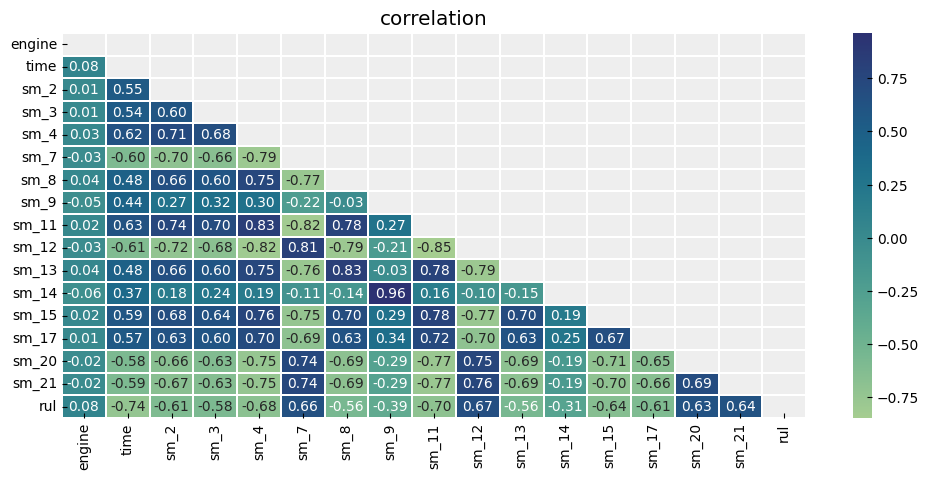

In [81]:
plt.figure(figsize = (12,5))
plt.grid() , plt.title('correlation')
sns.heatmap(df_corr , annot=True , fmt = '0.2f' , cmap='crest' , linewidths=0.01)

rul has good correlation with sensor measurements.
engine is ID , so it is irrelevant

<Axes: >

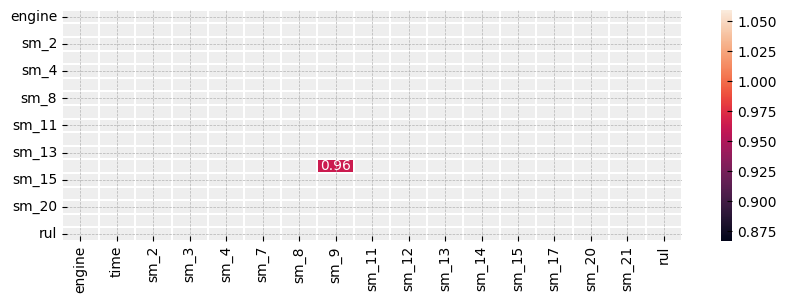

In [106]:
# visualization high corrolated features 
plt.figure(figsize = (10,3))
mask = df_corr.where( abs(df_corr) > 0.95 ).isna()
sns.heatmap(df_corr , annot=True , fmt = '0.2f' , linewidths=0.1 , mask = mask )

In [107]:
# detect more than 95% correlation
high_corr = []
for col in df_corr.columns:
    for row in df_corr.index:
        if abs(df_corr.loc[col , row]) > 0.95 :
            high_corr.append((col , row))
high_corr

[('sm_14', 'sm_9')]

In [108]:
# these 2 feature has very high correlation , no need for both of them , we can drop one of them
df.drop(columns = ['sm_9'] , inplace = True)

In [109]:
df.columns

Index(['engine', 'time', 'sm_2', 'sm_3', 'sm_4', 'sm_7', 'sm_8', 'sm_11',
       'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_17', 'sm_20', 'sm_21', 'rul'],
      dtype='object')

## EDA

In [6]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data_train , title='predictive maintenance')
profile

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.11/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.11/u/import-error

In [115]:
data_train['time'].describe().T
# there is 100 units(engins)
# time in cycles is between 1 time - 362 in cycle , cycle could be every turbin run

count    20631.000000
mean       108.807862
std         68.880990
min          1.000000
25%         52.000000
50%        104.000000
75%        156.000000
max        362.000000
Name: time, dtype: float64

In [116]:
# max , or failure time for each engine , or max time cycle , that engine has worked.
failure_time = df.groupby('engine')['rul'].max()

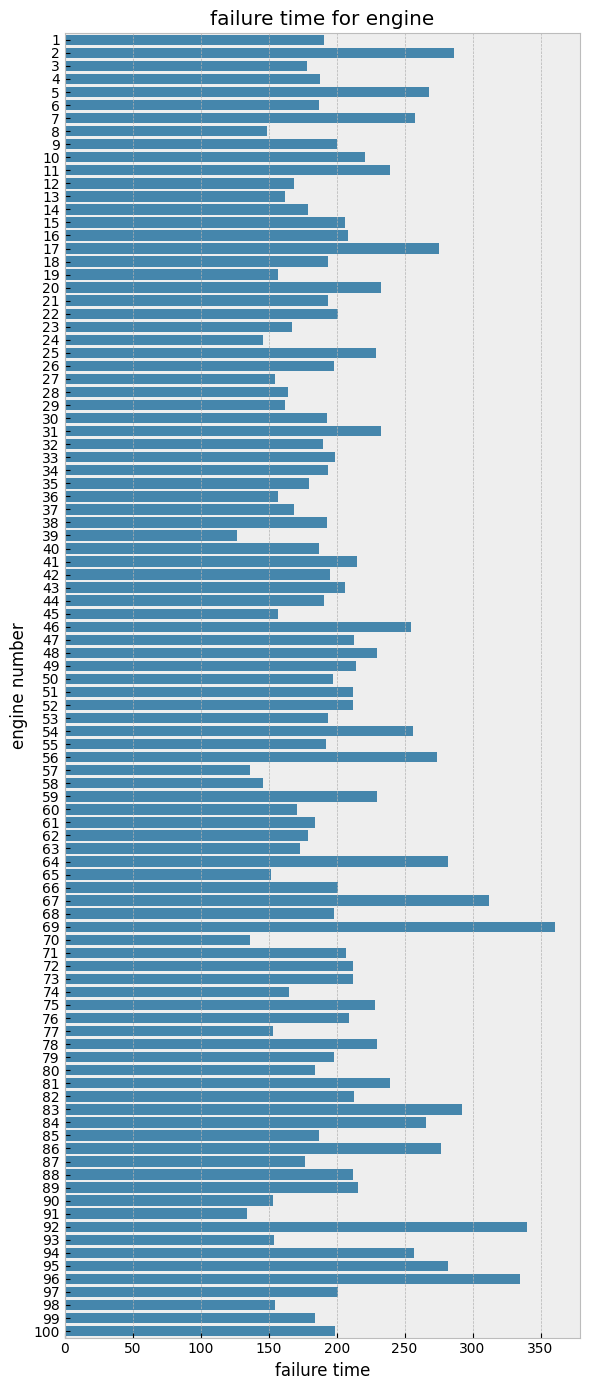

In [112]:
plt.figure(figsize = (6,14))
sns.barplot(y = failure_time.index , x = failure_time.values , orient='h')
plt.title('failure time for engine')
plt.xlabel('failure time')
plt.ylabel('engine number')
plt.tight_layout()
plt.show()

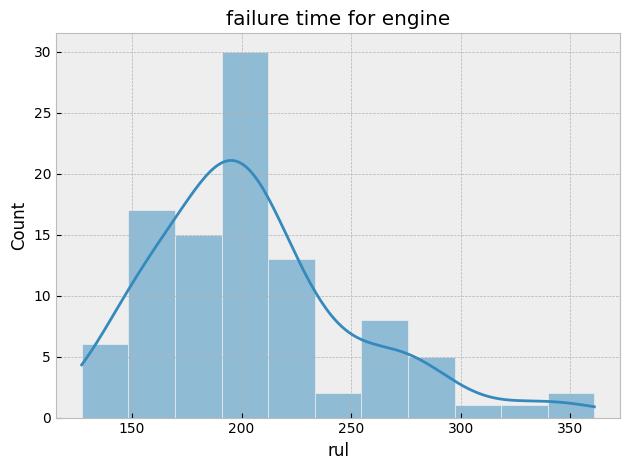

In [117]:
# distribution of failure time per engine
sns.histplot(failure_time , kde=True)
plt.title('failure time for engine')
plt.tight_layout()

In [ ]:
# sensor visualization

In [118]:
def plot_signal(df , signal_name , Sensor_dictionary):
    figure = plt.figure(figsize=(10,4))

    for engine in df['engine'].unique():  # hint
        if (engine % 10 ==0 ):
            #print(engine)
            rolling_window = df[ df['engine']==engine ].rolling(10).mean()
            sns.lineplot( data = rolling_window , x = 'rul' , y =signal_name  , label =engine)
    
    plt.tight_layout(), plt.xlim(250 , 0)
    plt.xlabel('Remainded Usefull Life (RUL)') , plt.ylabel(Sensor_dictionary[signal_name])
    plt.show()

#### hint
    df['engine'] == 10    engine number 10
for engine number 10 , it calculate , moving average of 10 frame MA(10)<br>
current value + 9 previous value  , this is for smoothing<br>
rolling(100).mean  make very smooth<br>
rollung(0).mean   it is same as , ploting each point of 222 row of engine 10 <br>
    
    for engine in df['engine'].unique():
            if (engine % 10 ==0 ):
                #print(engine)
                rolling_window = df[ df['engine']==engine ].rolling(10).mean()
                print(f'engine number {engine}')
                print(rolling_window)
                print('-' * 20)

<Figure size 1000x400 with 0 Axes>

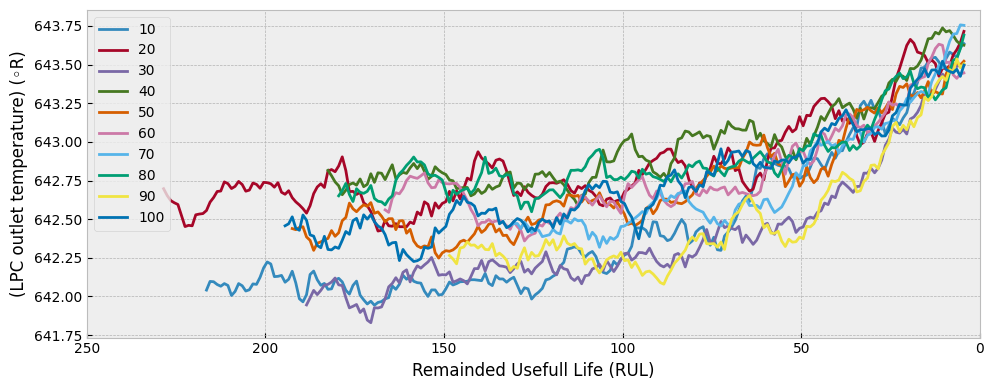

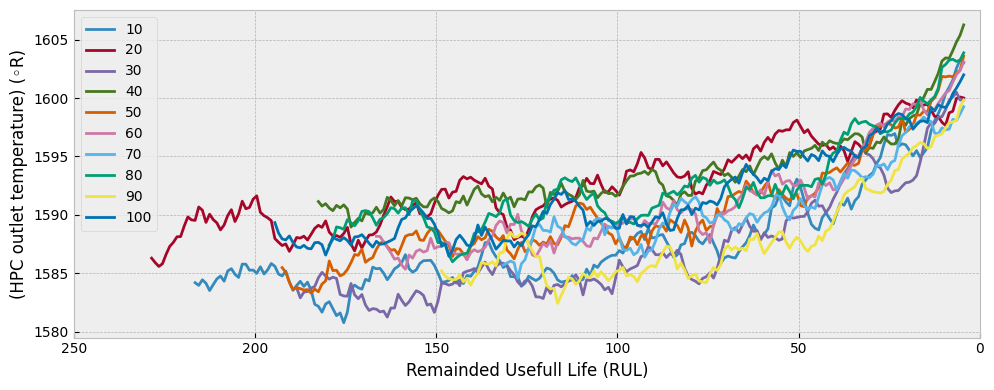

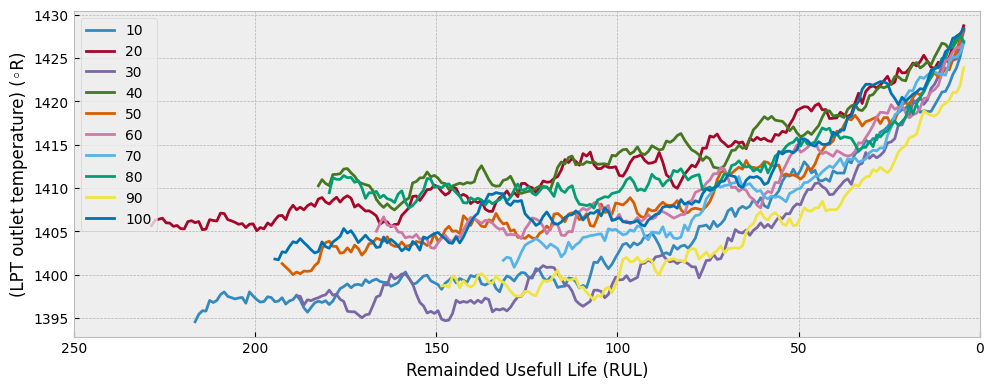

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

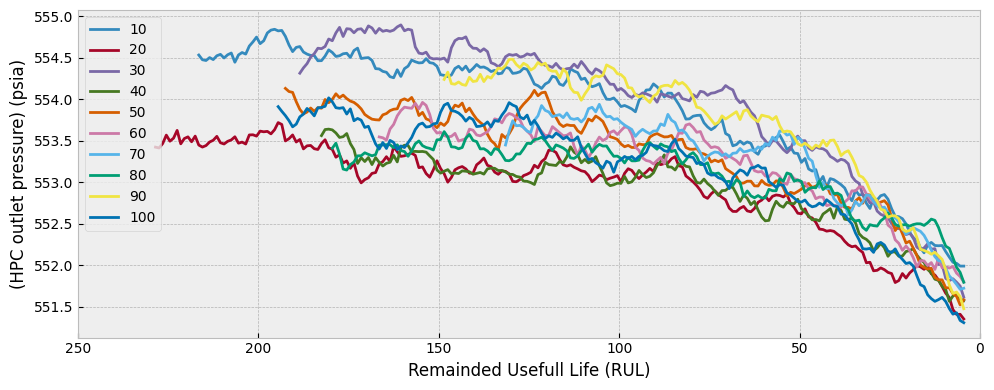

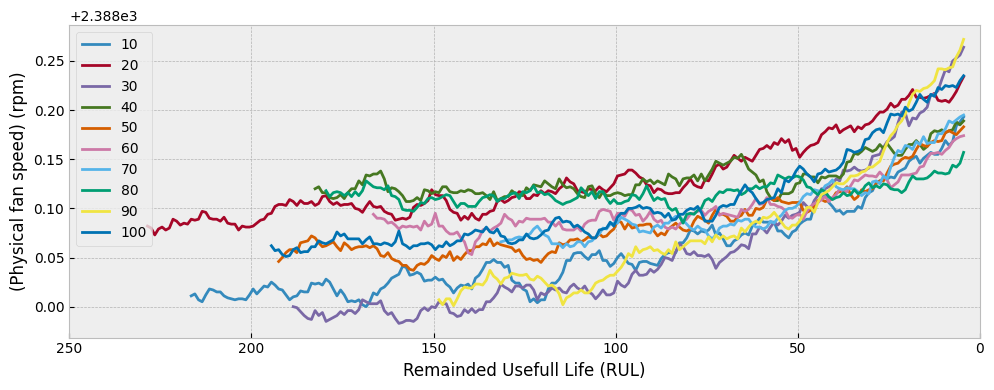

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

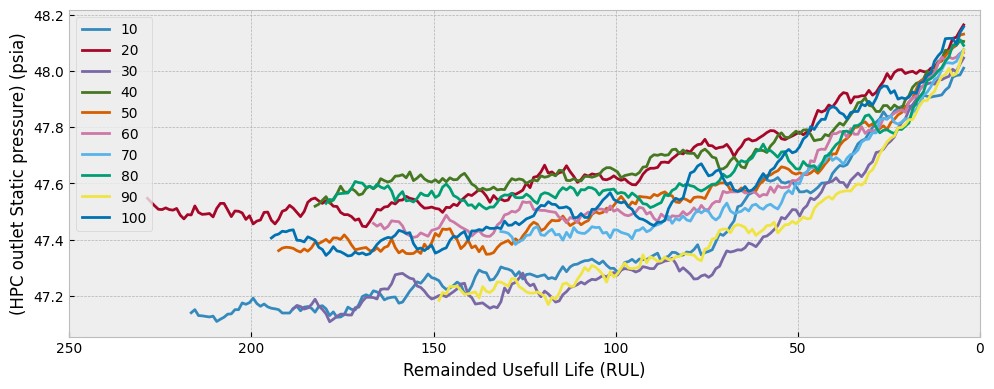

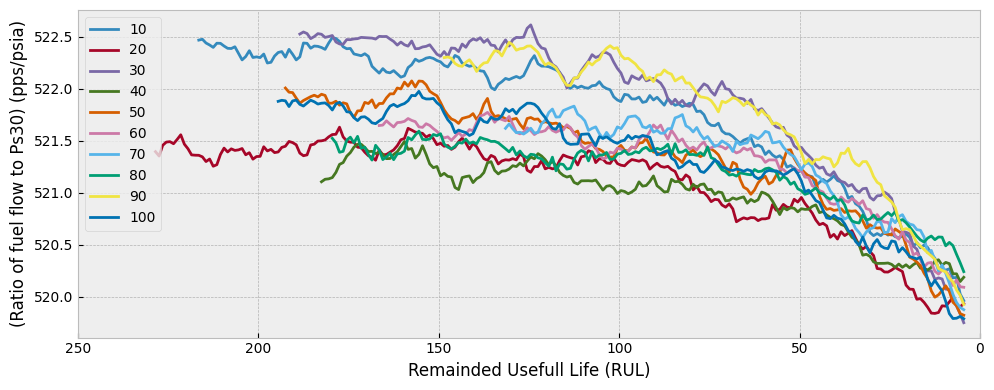

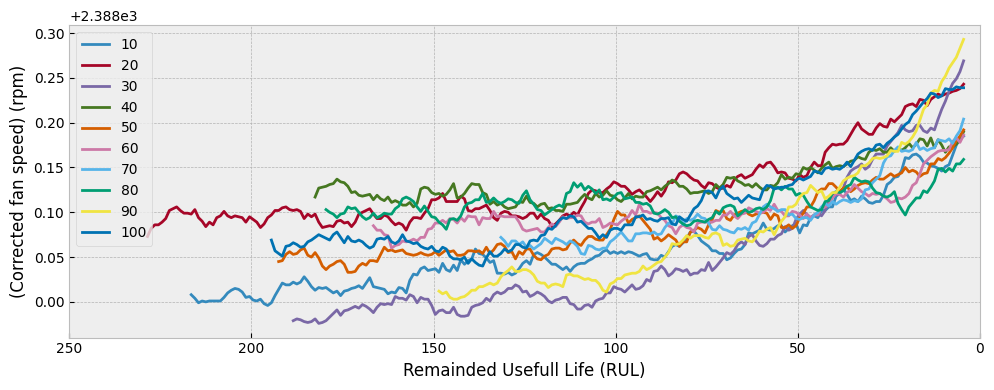

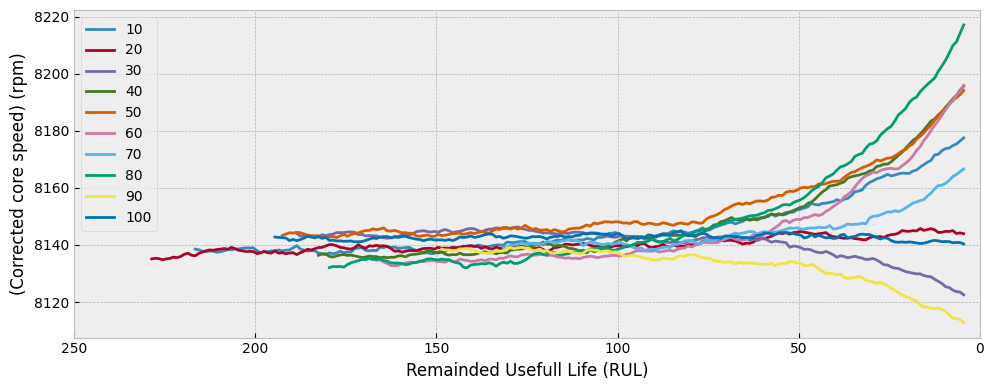

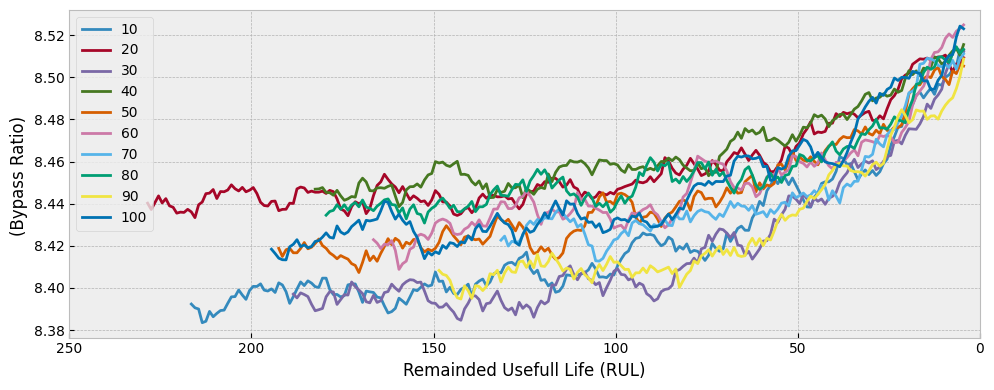

<Figure size 1000x400 with 0 Axes>

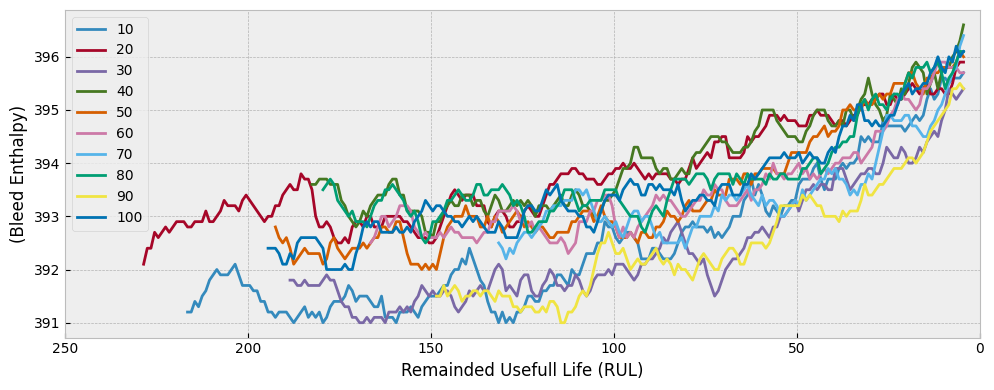

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

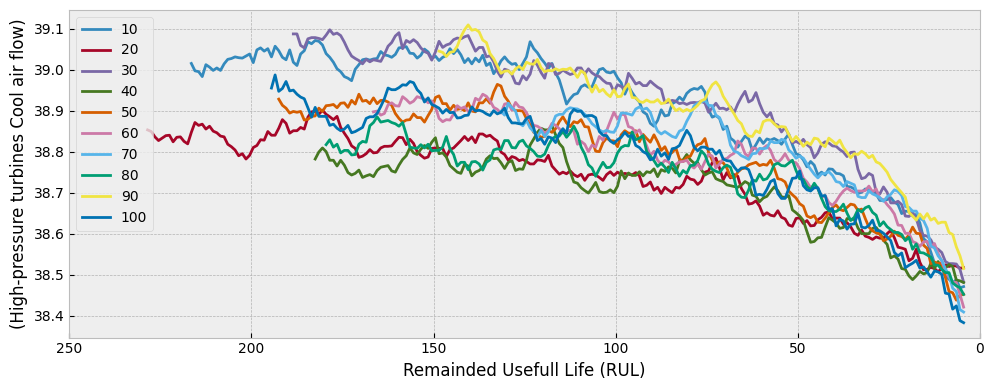

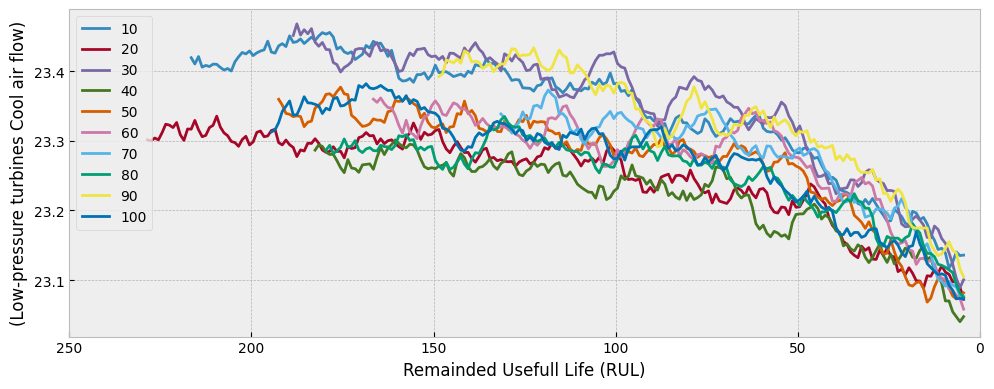

In [119]:
for i in range (1,22):
    try:
        plot_signal(df , 'sm_'+str(i)  , Sensor_dictionary)
    except:
        pass

# what are we doing
max time cycle , and RUL , they are opposite 
RUL in time cycle  = 1  , means rest of useful life , at beginings , and it belongs in dataframe to time of 1 
and max time in cycle for engin is eaquall RUL of 0 .means failed in this point.

in this case our target (label , y) could be df['rul'] , or df['time']
but we stick to one of them.
in **predictive maintenance** it is common consider RUL as target.

nasa has 3 sheet for dataset :  
1.train with 26000 sample , named  df , which , after preprocessing and EDA , and feature selection 

2.test set with 13000 sample , name it df_val ( for misleading i choose validation name instead of test)

3.rul for test set (df_val) , name it y_val , and its shape is 100x1 ( target or label or RUL for every engine in validation set of nasa)
so , df_train , df_val , y_val 

Split df_train  to train and test set
X_train , X_test , y_train , y_test  = train_test_split(X, y, test_size=0.2 , random_state=42)


for validation set , we take last registerd time for each engine , rul value for validation set (y_val) is rest useful time after max time of validation set , so take last reading of each engine , and convert validation set to 100 sample data , so X for validation set :
    
    X_val = df_val.groupby('engine').last().reset_index()
now , x_val is 100 sample of max time registerd in val set.  

### feture selection

In [120]:
print(df.columns)
features = df.columns[2:-1]   # drop  engine , time , rul of  dataset
features                      # for X ( train and val)

Index(['engine', 'time', 'sm_2', 'sm_3', 'sm_4', 'sm_7', 'sm_8', 'sm_11',

       'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_17', 'sm_20', 'sm_21', 'rul'],

      dtype='object')


Index(['sm_2', 'sm_3', 'sm_4', 'sm_7', 'sm_8', 'sm_11', 'sm_12', 'sm_13',
       'sm_14', 'sm_15', 'sm_17', 'sm_20', 'sm_21'],
      dtype='object')

we split train dataset to train and test , validation set( nasa separate dataset fot evaluating)

In [121]:
# train set
from sklearn.model_selection import train_test_split
X = df[features]
y = df['rul']

X_train , X_test , y_train , y_test  = train_test_split(X, y, test_size=0.2 , random_state=42)

In [124]:
# validation set 
X_val = df_val.groupby('engine').last().reset_index()    # take last row per engine , shows max time
X_val = X_val[features]   # no need for time in val set too

In [125]:
X_train.shape , X_test.shape , X_val.shape

((16504, 13), (4127, 13), (100, 13))

### Transforming data

In [127]:
# X ( X_tran and X_test ) sclae to 0 , 1 , and save to themselves.
from sklearn.preprocessing import MinMaxScaler , StandardScaler
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)      # fit on only train dataset

X_test = scaler.transform(X_test)            # use same transofrmation , no fit_traansform
X_val = scaler.transform(X_val)

# if we use fit_transform again , we will have different sclae , cause data leakage

In [ ]:
# metric function

In [128]:
from sklearn.metrics import root_mean_squared_error , r2_score 

def metrics(y_true , y_pred , label = 'train'):
    '''evaluate model , by taking y_true , y_pred and label of dataset'''
    
    rmse = root_mean_squared_error(y_true , y_pred)
    r2 = r2_score(y_true , y_pred)
    print(f'for {label} set , RMSE = {rmse:0.2f} , r2_score = {r2*100:0.2f}%')

# Modeling

## approach 1  , No limit for RUL
failure of engine prediction 

# linear regression

In [129]:
from sklearn.linear_model import LinearRegression
model_linreg = LinearRegression()
model_linreg.fit(X_train , y_train)

y_pred = model_linreg.predict(X_train)
metrics(y_train , y_pred , label = 'train')

y_pred = model_linreg.predict(X_test)
metrics(y_test , y_pred , label = 'test')

y_pred = model_linreg.predict(X_val)
metrics(y_val , y_pred , label = 'val')

for train set , RMSE = 44.82 , r2_score = 58.05%

for test set , RMSE = 44.29 , r2_score = 57.06%

for val set , RMSE = 31.87 , r2_score = 41.18%


# decision tree

In [130]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train , y_train)

y_pred = model_tree.predict(X_train)
metrics(y_train , y_pred , label = 'train')

y_pred = model_tree.predict(X_test)
metrics(y_test , y_pred , label = 'test')

y_pred = model_tree.predict(X_val)
metrics(y_val , y_pred , 'val')

for train set , RMSE = 0.00 , r2_score = 100.00%

for test set , RMSE = 60.41 , r2_score = 20.12%

for val set , RMSE = 47.04 , r2_score = -28.11%


# random forest

In [131]:
from sklearn.ensemble import RandomForestRegressor
model_forest = RandomForestRegressor(random_state=42 , n_jobs=-1 )
model_forest.fit(X_train , y_train)

y_pred = model_forest.predict(X_train)
metrics(y_train , y_pred , label = 'train')

y_pred = model_forest.predict(X_test)
metrics(y_test , y_pred , label = 'test')

y_pred = model_forest.predict(X_val)
metrics(y_val , y_pred , 'val')

for train set , RMSE = 15.77 , r2_score = 94.81%

for test set , RMSE = 41.61 , r2_score = 62.10%

for val set , RMSE = 34.12 , r2_score = 32.57%


In [ ]:
# random forest fine tuning

In [132]:
%%time
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from scipy.stats import randint   # it returen range of dist , not single value like np.random.randint
RandomForestRegressor()
param ={
    'max_depth' : [None , 10,20] , 
    'min_samples_split' : randint(2,10) , 
    'min_samples_leaf' :  randint(1,5)
} 
random_search_forest = RandomizedSearchCV(estimator=model_forest , param_distributions=param , n_iter=10 ,
                  cv = 5 , scoring = 'r2' , random_state=42 , n_jobs=-1)
random_search_forest.fit(X_train , y_train)

CPU times: total: 14.4 s

Wall time: 1min 48s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000138004A16D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001380051D820>},
                   random_state=42, scoring='r2')

In [133]:
df_res_forest = pd.DataFrame(random_search_forest.cv_results_).sort_values('mean_test_score')
df_res_forest[['mean_test_score' , 'params']]

,mean_test_score,params
9,0.630781,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
2,0.631408,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
6,0.632077,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_..."
0,0.633217,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_..."
5,0.633368,"{'max_depth': None, 'min_samples_leaf': 4, 'mi..."
1,0.633757,"{'max_depth': 20, 'min_samples_leaf': 3, 'min_..."
4,0.633757,"{'max_depth': 20, 'min_samples_leaf': 3, 'min_..."
7,0.635978,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_..."
8,0.636026,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_..."
3,0.636168,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_..."


In [134]:
# val score for random forest final model
model_fine_forest = random_search_forest.best_estimator_
print(model_fine_forest)

y_pred = model_fine_forest.predict(X_val)
metrics(y_val , y_pred, label = 'val')

RandomForestRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=8,

                      n_jobs=-1, random_state=42)

for val set , RMSE = 31.48 , r2_score = 42.61%


In [ ]:
# visual feature importance

In [ ]:
features

Text(0.5, 1.0, 'random forest model')

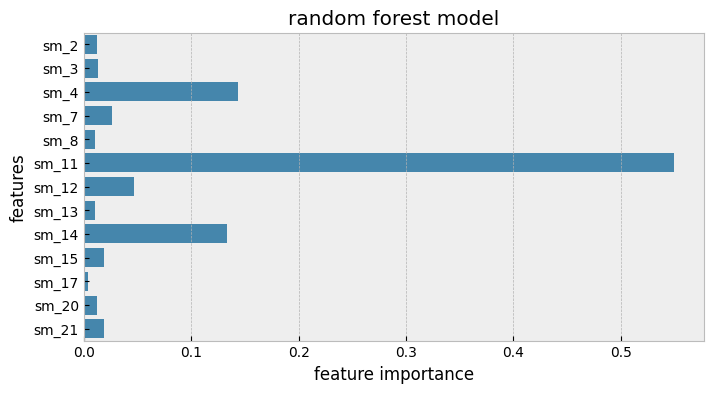

In [135]:
plt.figure(figsize = (8,4))
sns.barplot(y = features , x = model_fine_forest.feature_importances_ )
plt.xlabel('feature importance')
plt.ylabel('features')
plt.title('random forest model')

# svm

In [136]:
%%time
from sklearn.svm import SVR
model_svm = SVR()
model_svm.fit(X_train , y_train)

y_pred = model_svm.predict(X_train)
metrics(y_train , y_pred , label = 'train')

y_pred = model_svm.predict(X_test)
metrics(y_test , y_pred , label = 'test')

y_pred = model_svm.predict(X_val)
metrics(y_val , y_pred , 'val')

for train set , RMSE = 42.91 , r2_score = 61.54%

for test set , RMSE = 42.25 , r2_score = 60.93%

for val set , RMSE = 26.15 , r2_score = 60.41%

CPU times: total: 43.8 s

Wall time: 48.5 s


In [ ]:
# svm fine tuning 

In [137]:
%%time
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from scipy.stats import randint , uniform   # it returen range of dist , not single value like np.random.randint
model_svm = SVR()
param_grid = {
    'C': [5,10,15,20,30,50], 
    'kernel': ['rbf'],
    'gamma' : ['scale']
    }
random_search_svm = GridSearchCV(estimator=model_svm , param_grid=param_grid ,
                                 cv = 5, scoring = 'r2' , n_jobs=-1)
random_search_svm.fit(X_train , y_train)

CPU times: total: 11.2 s

Wall time: 1min 55s


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [5, 10, 15, 20, 30, 50], 'gamma': ['scale'],
                         'kernel': ['rbf']},
             scoring='r2')

In [138]:
df_svm = pd.DataFrame(random_search_svm.cv_results_)
df_svm[['mean_test_score' , 'params']].sort_values(by = 'mean_test_score' , ascending=False)

,mean_test_score,params
3,0.628245,"{'C': 20, 'gamma': 'scale', 'kernel': 'rbf'}"
4,0.628242,"{'C': 30, 'gamma': 'scale', 'kernel': 'rbf'}"
2,0.628168,"{'C': 15, 'gamma': 'scale', 'kernel': 'rbf'}"
5,0.627892,"{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}"
1,0.627580,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}"
0,0.625957,"{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}"


In [139]:
# val score for SVM final model
model_fine_svm = random_search_svm.best_estimator_
print(model_fine_svm)

y_pred = model_fine_svm.predict(X_val)
metrics(y_val , y_pred, label = 'val')

SVR(C=20)

for val set , RMSE = 27.57 , r2_score = 55.98%


In [ ]:
# visual feature importance

Text(0, 0.5, 'true y')

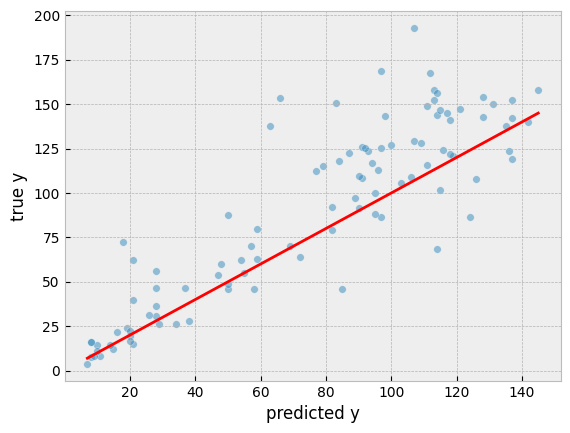

In [140]:
sns.scatterplot(x = y_val['RUL'] , y = y_pred  , s = 30 , alpha = 0.5)

sns.lineplot( x = [ min(y_val['RUL'])  , max(y_val['RUL']) ] , 
             y = [min(y_val['RUL']) , max(y_val['RUL'])] , color = 'red')
 

plt.xlabel('predicted y')
plt.ylabel('true y')

# XGBoosting ( ensemble , boosting method)

In [141]:
%%time
import xgboost as xgb
model_xgb = xgb.XGBRegressor(n_estimators = 20 , max_depth = 6, learning_rate = 0.1 , 
                 reg_lambda = 0.02 , gamma = 0.4 , random_state = 42 )
model_xgb.fit(X_train , y_train )

y_pred = model_xgb.predict(X_train)
metrics(y_train , y_pred)

y_pred = model_xgb.predict(X_test)
metrics(y_test , y_pred)

y_pred = model_xgb.predict(X_val)
metrics(y_val , y_pred)

for train set , RMSE = 40.50 , r2_score = 65.75%

for train set , RMSE = 41.77 , r2_score = 61.81%

for train set , RMSE = 29.79 , r2_score = 48.60%

CPU times: total: 516 ms

Wall time: 366 ms


In [ ]:
# fine tuning

In [142]:
%%time
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from scipy.stats import randint , uniform   # it returen range of dist , not single value like np.random.randint

model_xgb = xgb.XGBRegressor()
param_distributions = {
    'n_estimators': randint(50, 500),  # Number of boosting rounds (trees)
    'learning_rate': uniform(0.01, 0.3),  # Step size shrinking to prevent overfitting
    'max_depth': randint(3, 15),  # Maximum depth of a tree
    'min_child_weight': randint(1, 10),  # Minimum sum of instance weight needed in a child
    'subsample': uniform(0.5, 0.5),  # Subsample ratio of the training instances
    'colsample_bytree': uniform(0.5, 0.5),  # Subsample ratio of columns when constructing each tree
    'gamma': uniform(0, 5),  # Minimum loss reduction required to make a further partition
    'reg_alpha': uniform(0, 1),  # L1 regularization term on weights
    'reg_lambda': uniform(0, 1)  # L2 regularization term on weights
}
random_search_xgb = RandomizedSearchCV(estimator=model_xgb , param_distributions=param_distributions ,
                                   n_iter=10 , cv = 5 , scoring = 'r2' , random_state=42 , n_jobs=-1)
random_search_xgb.fit(X_train , y_train)

CPU times: total: 4.77 s

Wall time: 28.6 s


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000138325E8DA0>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000138326AA570>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000138326AA840>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000013832601A60>},
                   random_state=42, scoring='r2')

In [143]:
df_xgb = pd.DataFrame(random_search_xgb.cv_results_)
df_xgb[['mean_test_score' , 'params']].sort_values(by = 'mean_test_score' , ascending=False)

,mean_test_score,params
1,0.637854,"{'colsample_bytree': 0.8005575058716043, 'gamm..."
3,0.633891,"{'colsample_bytree': 0.8037724259507192, 'gamm..."
5,0.625603,"{'colsample_bytree': 0.8776807051588262, 'gamm..."
2,0.618020,"{'colsample_bytree': 0.6521211214797689, 'gamm..."
7,0.609261,"{'colsample_bytree': 0.9143687545759647, 'gamm..."
8,0.596750,"{'colsample_bytree': 0.8861223846483287, 'gamm..."
6,0.594074,"{'colsample_bytree': 0.9633294328968971, 'gamm..."
0,0.584747,"{'colsample_bytree': 0.6872700594236812, 'gamm..."
4,0.549679,"{'colsample_bytree': 0.6154469128110744, 'gamm..."
9,0.525065,"{'colsample_bytree': 0.9631504392566745, 'gamm..."


In [97]:
model_fine_xgb = random_search_xgb.best_estimator_
print(model_fine_xgb)

y_pred = model_fine_xgb.predict(X_val)
metrics(y_val , y_pred , 'val')

XGBRegressor(base_score=None, booster=None, callbacks=None,

             colsample_bylevel=None, colsample_bynode=None,

             colsample_bytree=0.8005575058716043, device=None,

             early_stopping_rounds=None, enable_categorical=False,

             eval_metric=None, feature_types=None, gamma=3.540362888980227,

             grow_policy=None, importance_type=None,

             interaction_constraints=None, learning_rate=0.016175348288740735,

             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,

             max_delta_step=None, max_depth=4, max_leaves=None,

             min_child_weight=8, missing=nan, monotone_constraints=None,

             multi_strategy=None, n_estimators=463, n_jobs=None,

             num_parallel_tree=None, random_state=None, ...)

for val set , RMSE = 31.94 , r2_score = 40.91%


### best score 
#### by now , svm with c = 20 , has the highest score on validation set 56%  and 63% for test set

## appraoch 2 clipping rul ( consideration limit for rul)

our main goal is predictive maintenace , so we can limit(clip) rul of engines to a specific value , which means we clip higher than special point , we consider same value for all of rul.<br>
this specific value is related to domain expert and company and industry and riks of task.
we dont have any data about it , but we assume close value to mean of failure time<br>
based on below data , 
**max rul time for engine is between 127 - 361 , and mean time is 205 and standatd deviation is 46**
we clip higher rul value from 200 to 200.
### why we do this?
higher rul value for engine shows , this engine work fine , it is far from failure .
#### we set it to 125  , that it acts like alarm , to keep on eye it , and action time would be result of this value.(domain expert data required)
## if we set it to 125 . we reach higher accuracy  , 80 % ( codes are below)

In [145]:
failure_time.describe()

count    100.000000
mean     205.310000
std       46.342749
min      127.000000
25%      176.000000
50%      198.000000
75%      228.250000
max      361.000000
Name: rul, dtype: float64

(100.0, 400.0)

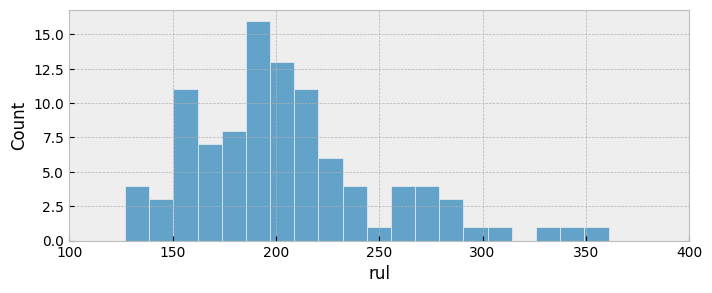

In [146]:
plt.figure(figsize = (8,3))
sns.histplot(failure_time ,bins = 20 )
plt.xlim(100 , 400)

### clip to 125

<Axes: xlabel='rul', ylabel='Count'>

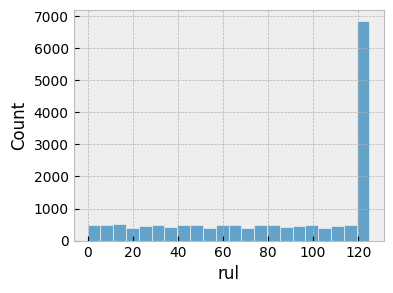

In [158]:
y_train_clipped = y_train.clip(upper = 125)
plt.figure(figsize = (4,3))
sns.histplot(y_train_clipped)

In [ ]:
# random forest

In [149]:
%%time
random_search_forest.fit(X_train , y_train_clipped)

CPU times: total: 14 s

Wall time: 1min 49s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000138004A16D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001380051D820>},
                   random_state=42, scoring='r2')

In [150]:
df_res_forest = pd.DataFrame(random_search_forest.cv_results_).sort_values('mean_test_score')
df_res_forest[['mean_test_score' , 'params']]

,mean_test_score,params
9,0.806988,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
2,0.807197,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
6,0.807720,"{'max_depth': 20, 'min_samples_leaf': 2, 'min_..."
1,0.808762,"{'max_depth': 20, 'min_samples_leaf': 3, 'min_..."
4,0.808762,"{'max_depth': 20, 'min_samples_leaf': 3, 'min_..."
0,0.808778,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_..."
5,0.808875,"{'max_depth': None, 'min_samples_leaf': 4, 'mi..."
8,0.809939,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_..."
3,0.810103,"{'max_depth': 10, 'min_samples_leaf': 3, 'min_..."
7,0.810148,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_..."


In [157]:
model_fine_forest = random_search_forest.best_estimator_
print(model_fine_forest)

# val score for random forest final model
y_pred = model_fine_forest.predict(X_val)
metrics(y_val , y_pred, label = 'val')

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=5,

                      n_jobs=-1, random_state=42)

for val set , RMSE = 17.91 , r2_score = 81.43%


In [ ]:
# validation score raised to 81% , if we consider rul clip

# SVM

In [152]:
%%time
random_search_svm.fit(X_train , y_train_clipped)


CPU times: total: 12.4 s

Wall time: 1min 53s


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [5, 10, 15, 20, 30, 50], 'gamma': ['scale'],
                         'kernel': ['rbf']},
             scoring='r2')

In [153]:
df_svm = pd.DataFrame(random_search_svm.cv_results_).sort_values(by = 'mean_test_score' , ascending=False)
df_svm[['mean_test_score' , 'params']]

,mean_test_score,params
1,0.798143,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}"
2,0.798057,"{'C': 15, 'gamma': 'scale', 'kernel': 'rbf'}"
3,0.797853,"{'C': 20, 'gamma': 'scale', 'kernel': 'rbf'}"
4,0.797673,"{'C': 30, 'gamma': 'scale', 'kernel': 'rbf'}"
0,0.797593,"{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}"
5,0.797379,"{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}"


In [154]:
model_fine_svm = random_search_svm.best_estimator_
print(model_fine_svm)

# val score for random forest final model
y_pred = model_fine_svm.predict(X_val)
metrics(y_val , y_pred, label = 'val')

SVR(C=10)

for val set , RMSE = 19.57 , r2_score = 77.82%


In [ ]:
# XGBoosting

In [155]:
%%time
random_search_xgb.fit(X_train , y_train_clipped)

CPU times: total: 4.61 s

Wall time: 26 s


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000138325E8DA0>,
                                        'reg_alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000138326AA570>,
                                        'reg_lambda': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000138326AA840>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000013832601A60>},
                   random_state=42, scoring='r2')

In [156]:
df_xgb = pd.DataFrame(random_search_xgb.cv_results_)
df_xgb[['mean_test_score' , 'params']].sort_values(by = 'mean_test_score' , ascending=False)

,mean_test_score,params
1,0.812524,"{'colsample_bytree': 0.8005575058716043, 'gamm..."
3,0.811105,"{'colsample_bytree': 0.8037724259507192, 'gamm..."
5,0.805875,"{'colsample_bytree': 0.8776807051588262, 'gamm..."
2,0.804055,"{'colsample_bytree': 0.6521211214797689, 'gamm..."
7,0.795588,"{'colsample_bytree': 0.9143687545759647, 'gamm..."
6,0.789819,"{'colsample_bytree': 0.9633294328968971, 'gamm..."
0,0.785882,"{'colsample_bytree': 0.6872700594236812, 'gamm..."
4,0.764590,"{'colsample_bytree': 0.6154469128110744, 'gamm..."
8,0.764037,"{'colsample_bytree': 0.8861223846483287, 'gamm..."
9,0.752822,"{'colsample_bytree': 0.9631504392566745, 'gamm..."


In [115]:
model_fine_xgb = random_search_xgb.best_estimator_
print(model_fine_xgb)

y_pred = model_fine_xgb.predict(X_val)
metrics(y_val , y_pred , 'val')

XGBRegressor(base_score=None, booster=None, callbacks=None,

             colsample_bylevel=None, colsample_bynode=None,

             colsample_bytree=0.8005575058716043, device=None,

             early_stopping_rounds=None, enable_categorical=False,

             eval_metric=None, feature_types=None, gamma=3.540362888980227,

             grow_policy=None, importance_type=None,

             interaction_constraints=None, learning_rate=0.016175348288740735,

             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,

             max_delta_step=None, max_depth=4, max_leaves=None,

             min_child_weight=8, missing=nan, monotone_constraints=None,

             multi_strategy=None, n_estimators=463, n_jobs=None,

             num_parallel_tree=None, random_state=None, ...)

for val set , RMSE = 28.56 , r2_score = 52.77%


### best model is random foreset with 82 % accuracy for clipping to 125

# results

### no clipping approach 
#### svm with c = 20 ,r2_score 56% in valiadtion set
### clipping to 125
#### random forest with r2_score 82 % on validation set